In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="white", font="serif", rc=custom_params)

# Functions to plot

In [2]:
n = 11

In [3]:
def plot_bar(ax, X, Y, xticks,color):
    ax.bar(X,Y,align='center',alpha = 0.2,ec=color,width=X[1]-X[0],facecolor=color)
    ax.set_xticks(xticks)
    ax.margins(0.01)


In [4]:
def plot_line(ax,X,Y,color):
    ax.plot(X,Y,linewidth=2,color=color)

In [5]:
def plot_array(ax,lst,name,cmap):
    pad = [min(lst)]*(n-len(lst))
    texts = ['?']*(len(pad)) + [str(i) for i in lst]
    lst = pad + lst.tolist()
    sns.heatmap([lst],cmap=cmap,cbar=False,xticklabels=np.arange(n),yticklabels=[name],annot=np.array([texts]),annot_kws={"size":14},center=min(lst),linewidths=0.2,ax=ax,fmt='s')

# Example
An array `A = [9,  7,  5,  3,  1, -1, -3, -5, -7, -9]` (index from 1), is also an arithmetic sequence of 10 numbers as $$A_i = 11 - 2i$$ The sum of the sequence can be easily calculated as:
$S_{n} = \sum_{i=1}^{n} = -n^2+10n$ and we let $S_0 = 0$. So the partial sum of a subsequence `A[i:j]` can be obtained by: $$S_j-S_{i-1}$$

In [6]:
idx = np.arange(0, 11) 
nums = idx*(10-idx) # pre sum of A
X = np.linspace(0, 10, 500) # dx -> 0
Y = X*(10-X)
diff =nums[1:] - nums[:-1] # Array A

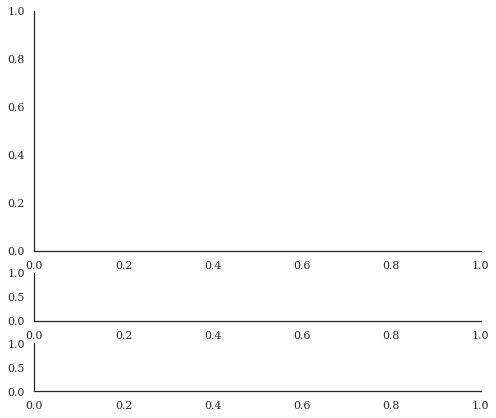

In [7]:
fig,axes = plt.subplots(3,1,figsize=(8,7),gridspec_kw={'height_ratios': [5,1,1]})

In [8]:
plot_bar(axes[0],idx[1:],diff,idx,"C0")
plot_line(axes[0],idx[1:],diff,"C0")
plot_bar(axes[0],idx,nums,idx,"C3")
plot_line(axes[0],X,Y,"C3")

In [9]:
plot_array(axes[1],diff,name="A",cmap="RdBu")
plot_array(axes[2],nums,name="pre",cmap="RdBu_r")

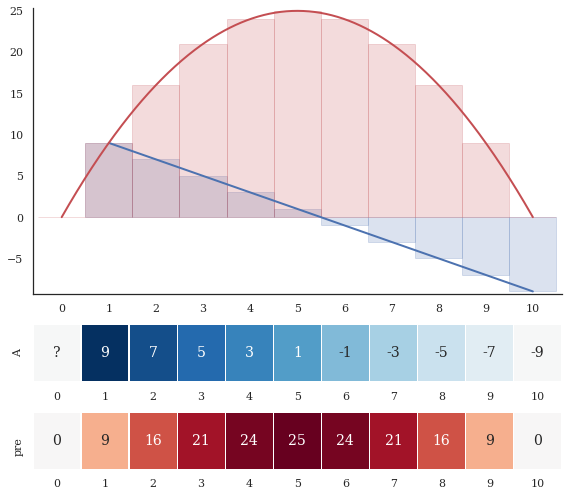

In [10]:
fig.tight_layout()
fig

In [11]:
fig.savefig("../docs/images/prefix-sum.png",dpi=200)

In [12]:
dx = np.linspace(0, 10, 100)
dy = dx*(10-dx)

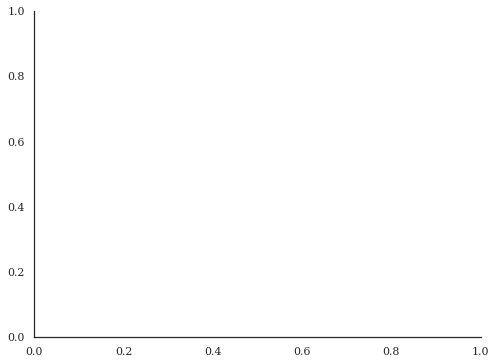

In [13]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

In [14]:
plot_bar(ax,dx,dy,idx,"C3")
plot_bar(ax,dx[1:],dy[1:]-dy[:-1],idx,"C0")
plot_line(ax,dx[1:],dy[1:]-dy[:-1],"C0")
plot_line(ax,X,Y,"C3")

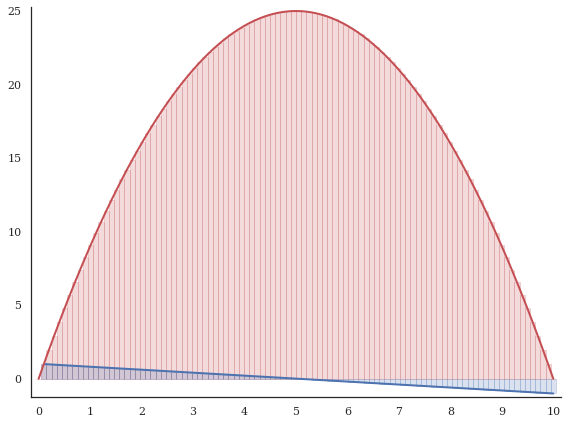

In [15]:
fig.tight_layout()
fig

In [16]:
fig.savefig("../docs/images/integral.png",dpi=200)

# Diff

nums

In [17]:
def get_rect():
    boxes = []
    for i in range(1,n//2+1):
        y_lower = (i-1)*(10-i+1)
        y_upper = i*(10-i)
        gap = y_upper - y_lower
        boxes.append(Rectangle((i,y_lower),10-2*i,gap))
    return boxes


In [18]:
def plot_rect(ax):
    pc = PatchCollection(get_rect(), facecolor="C0", edgecolor="C0", alpha=0.2)
    ax.add_collection(pc)
    ax.margins(0.01)
    ax.set_xticks(np.arange(0,n))


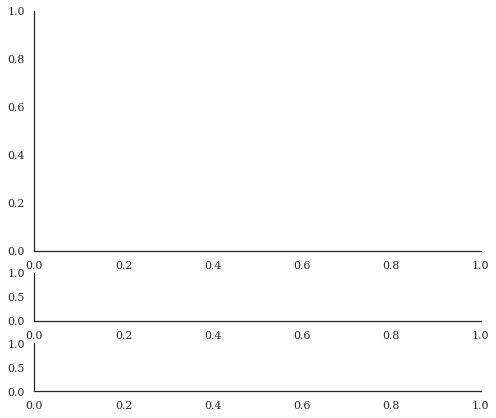

In [19]:
fig,axes = plt.subplots(3,1,figsize=(8,7),gridspec_kw={'height_ratios': [5,1,1]})

In [20]:
plot_line(axes[0],X,Y,"C3")
plot_rect(axes[0])

In [21]:
plot_array(axes[1],np.concatenate(([0],diff)),name="diff",cmap="RdBu")
plot_array(axes[2],nums,name="A",cmap="RdBu_r")

In [22]:
axes[0].set_xlim(-0.5,n-0.5)

(-0.5, 10.5)

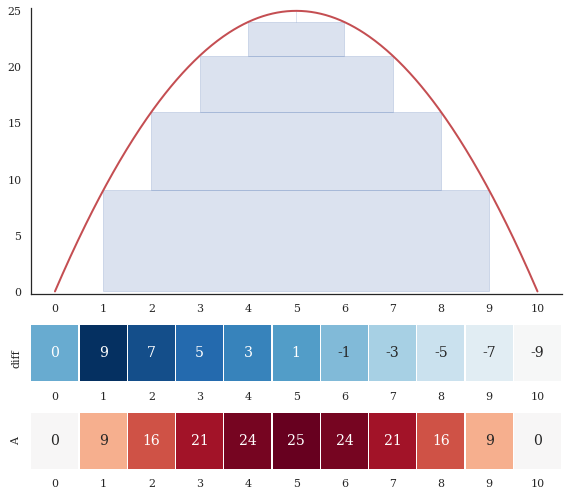

In [23]:
fig.tight_layout()
fig

In [24]:
fig.savefig("../docs/images/diff-interval.png",dpi=200,tight_layout=True)

In [25]:
def plot_intervals(ax,intervals):
    viridis = plt.cm.get_cmap('viridis', len(intervals))
    colors = viridis(np.linspace(0, 1, len(intervals)))
    boxes = [Rectangle((interval[0], interval[2]), interval[1]-interval[0], interval[3]) for i,interval in enumerate(intervals)]
    pc = PatchCollection(boxes, facecolor=colors,edgecolor='black',linewidths=1,alpha=0.2)
    ax.add_collection(pc)
    ax.margins(0.01)
    ax.set_xticks(np.arange(0,n))

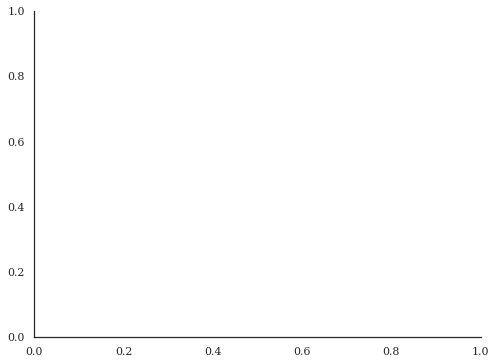

In [26]:
fig,ax = plt.subplots(figsize=(8,6))

In [27]:
intervals = [(1,2,0,9),(2,3,0,16),(3,9,0,3),(3,6,3,10),(6,9,3,6),(3,7,16,5),
(3,8,13,3),(6,8,9,4),(4,5,21,3),(5,6,21,3)]

In [28]:
plot_intervals(ax,intervals)
plot_line(ax,X,Y,"C3")

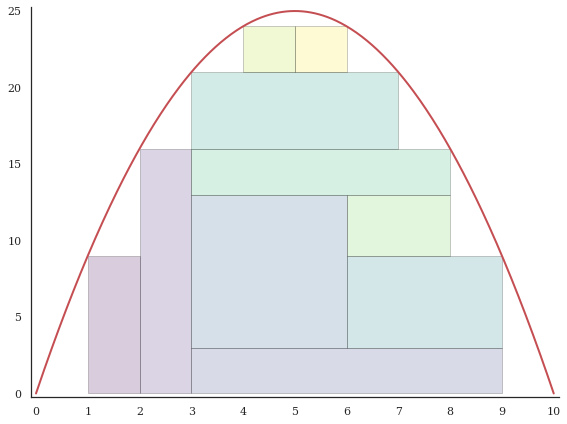

In [29]:
fig.tight_layout()
fig

In [30]:
fig.savefig("../docs/images/mess-intervals.png",dpi=200)

: 